In [14]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [78]:
import statsmodels.formula.api as smf

import statsmodels.api as sm

import pandas as pd
import geopandas as gpd
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.core.display import display, HTML
import seaborn as sns
import pandas as pd
import numpy as np
import folium
from folium.plugins import BeautifyIcon
import branca
import folium
from folium.plugins import MarkerCluster
from folium import IFrame
import shapely
from shapely.geometry import Point
# Legend
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import pandas as pd
import geopandas as gp
from geopandas.tools import sjoin
import qgrid
import base64
import math
import os
import numpy as np
import seaborn as sns
import unicodedata
import pysal as ps
import branca
import re
import json
import requests
import geopandas as gp
import pickle
import unidecode
plt.rcParams.update({'font.size': 16})
import warnings
warnings.filterwarnings('ignore')
import datetime

In [23]:
# Import excel
df = pd.read_csv( r'_data/data_replication.csv', encoding='latin-1' )
# Import Shapefile
shp = gpd.read_file( r"_data/Murdock_EA_2011_vkZ.geojson" )

In [278]:
# Selecting columns from data
df1 = df[[ "respno", "region", "centroid_lat", "centroid_long", "trust_relatives", 'trust_neighbors', 'trust_local_council', 
         'intra_group_trust', 'inter_group_trust'  ]].dropna().copy()

# Generating geodataframe
centroids_geo = gpd.GeoDataFrame( df1 , geometry= gp.points_from_xy( df1.centroid_long, df1.centroid_lat ) )
centroids_geo = centroids_geo.set_crs("EPSG:4326")

# Selecting Variables from shapefile
# shp2 = shp[ [ 'id', 'NAME', 'geometry' ] ].copy()

# Genereting Intersection
intersect = gpd.overlay(centroids_geo, shp,  how='intersection')

In [275]:
intersect = intersect[~intersect.respno.duplicated()].copy()

In [ ]:
shp.CultureGrp

In [288]:
shp3 = gpd.read_file(r"C:\Users\Anzony\Downloads\murdock_shapefile\borders_tribes.shp")

<AxesSubplot:>

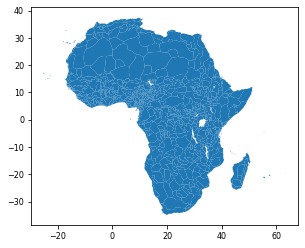

In [290]:
shp3.plot()

In [286]:
shp.columns[:30]

Index(['id', 'NAME', 'TRIBE_CODE', 'LAT', 'LON', 'Name_Displ', 'CODE',
       'CultureGrp', 'Name_30', 'Cultgrp_30', 'Code_30', 'NOTES', 'CodeType',
       'Shape_Leng', 'Shape_Area', 'v107', 'keywords', 'V107_1', 'V112',
       'V113', 'V114', 'V100', 'V102', 'V104', 'V106', 'V1', 'V2', 'V3', 'V4',
       'V5'],
      dtype='object')

In [279]:
intersect.groupby([ 'region', 'NAME'], as_index = False )['respno'].count()

,region,NAME,respno
0,abia,IBO,22
1,adamawa,BAUCHI,20
2,adamawa,HAUSA,5
3,adamawa,IBIBIO,1
4,adamawa,IGBIRA,1
...,...,...,...
1050,ziguinchor,FOUTATORO,3
1051,ziguinchor,SERER,2
1052,ziguinchor,SONINKE,1
1053,zou,FON,100


In [245]:
shp.dropna()[ shp['Name_Displ'].dropna().str.startswith('NG') ]

,id,NAME,TRIBE_CODE,LAT,LON,Name_Displ,CODE,CultureGrp,Name_30,Cultgrp_30,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,geometry
199,692,NGANDU,585,0.026797,23.358700,NGANDU,Ae24,Mongo,15,10,...,,,0,,,,,0,0,"MULTIPOLYGON (((23.45631 1.26144, 23.53736 1.1..."
203,447,NGAMA,584,7.654117,17.463400,NGAMA,Ai1,Banda-Baya,14,9,...,,,0,,,,,0,0,"MULTIPOLYGON (((18.06928 8.17740, 18.05652 8.0..."
255,485,NGBELE,587,2.884491,28.338800,NGBELE,Af10,Ibo-Edo,17,15,...,,,0,,,,,0,0,"MULTIPOLYGON (((28.66074 2.87571, 28.64895 2.7..."
397,288,NGE,588,7.592257,6.981399,NGE,Af30,Nupe-Idoma,18,21,...,,,0,,,,,0,0,"MULTIPOLYGON (((6.87446 7.86331, 6.91545 7.834..."
404,786,NGINDO,590,-9.375140,37.869300,NGINDO,Ac42,Yao-Makonde,20,12,...,,,0,,,,,0,0,"MULTIPOLYGON (((38.92633 -8.28325, 38.92789 -8..."
432,391,NGALA,583,1.269528,18.862500,NGALA,Ae28,Riverain Congo,13,25,...,A,e,28,insufficient information or not coded,not coded,not coded,Africa- Mideastern,3,2,"MULTIPOLYGON (((20.09410 2.30164, 20.10049 2.3..."
433,388,NGBANDI,586,3.766859,21.832800,NGBANDI,Ai26,Banda-Baya,16,9,...,A,i,26,insufficient information or not coded,not coded,not coded,Africa- Mideastern,3,3,"MULTIPOLYGON (((23.08177 3.77482, 23.08010 3.7..."
436,34,NGERE,589,6.856040,-8.023420,NGERE,Af56,"Mande, Southern",19,2,...,A,f,56,insufficient information or not coded,not coded,not coded,Africa- Mideastern,3,7,"MULTIPOLYGON (((-8.26594 7.72705, -8.22909 7.5..."
437,0,NGIZIM,591,12.124600,10.800000,NGIZIM,Cb19,Bornu,21,22,...,C,b,29,insufficient information or not coded,not coded,not coded,Africa- Mideastern,7,14,"MULTIPOLYGON (((11.27729 12.42689, 11.29721 12..."
438,394,NGOMBE,592,-0.895764,21.468600,NGOMBE,Ae39,Ngombe,22,13,...,A,e,39,insufficient information or not coded,not coded,not coded,Africa- Mideastern,3,2,"MULTIPOLYGON (((22.07675 -1.80388, 21.98403 -1..."


In [ ]:
b.difference( a )

In [243]:
a.difference( b )

{'Cannot match to Murdock name', 'NGONI', 'NIKA'}

1. Los autores discuten cómo utilizar la variable número de exportaciones. En la tabla 1 del paper se discute la transformación de la variable tratamiento. La miden en seis formas distintas: $thousands$, $Exports/Area$, $Exports/Historical_Population$, $ln(1+exports)$,  $ln(1+\frac{exports}{area})$, $ln(1+\frac{exports}{Historical_Population})$. Uno de los problemas de esta variable es que presenta una cola a la derecha. A continuación presentamos un histograma de la variable en cada una de dichas representaciones.

In [178]:
x_vars = [ 'exports', 'export_area', 'export_pop', 'ln_exports', 'ln_export_area', 'ln_export_pop' ]

In [179]:
'export_area'

'Export Area'

<AxesSubplot:xlabel='ln_export_pop', ylabel='Density'>

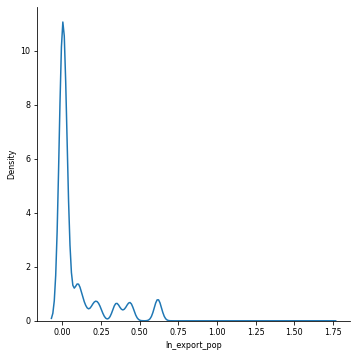

In [208]:
sns.displot( x = variable, kind="kde",
                     data = df ).axes[0][0]

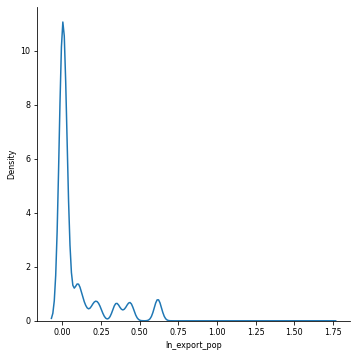

In [205]:
ax.fig

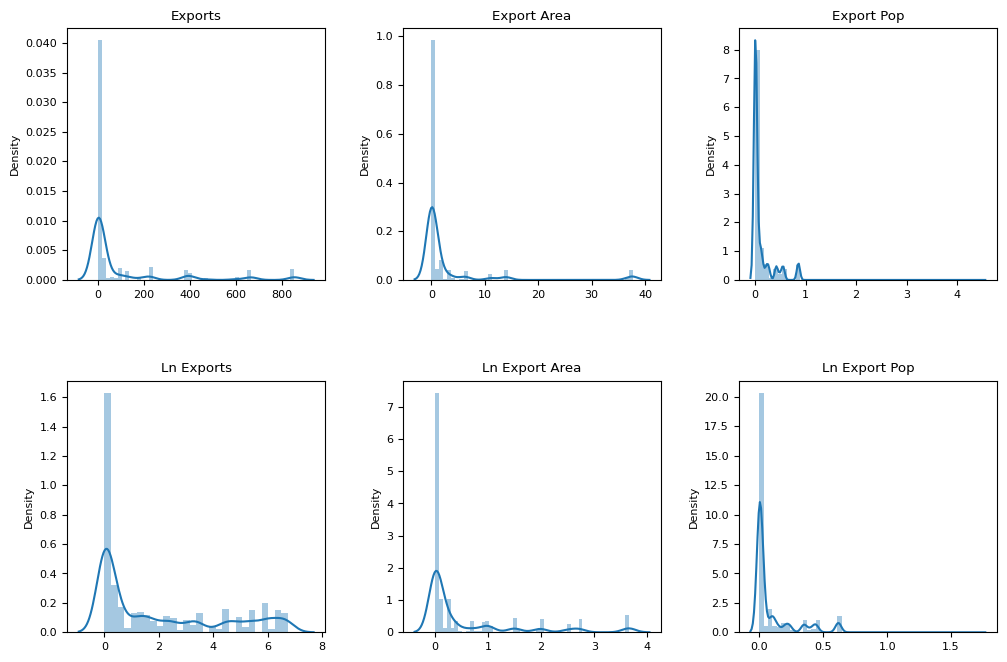

In [215]:
################################### PLOT ###################################
# Create a grid plot 
gs00 = matplotlib.gridspec.GridSpec( 2, 3 )
# Setting
fig = plt.figure( figsize = ( 12, 8 ), dpi = 100 )
axs = []

plt.rcParams.update({'font.size': 8})

# Define Colors
colors = sns.color_palette("mako_r", 5 )

# Index of countries
idx = 0 
for i in range( 2 ):
    
    for j in range( 3 ):
        
        # Generate the axis
        ax = fig.add_subplot( gs00[ i , j ] )
            
        # Select variable 
        variable = x_vars[ idx ]
        
        # Title
        title = variable.replace("_", " ").title()
        
        ########################## Relative Frequency #########################

        # Generate figure
        sns.distplot( df[variable],
                     )
        
        

        # Axis labels
        plt.xlabel( "" )

        # Title figure
        plt.title( title )


        # Append plot to axis
        axs.append( ax )
        
        idx = idx + 1

# space between plots
plt.subplots_adjust( wspace = 0.3, hspace = 0.4 )

# # # settings all figure
# fig.suptitle( "Development of Trips and Registrations over Time by variable" , size = 18 )
# fig.tight_layout( pad = 2.0 )

# Save figure
plt.savefig( r"_output/x_var_distribution.png" )

In [175]:
df2 = df[ x_vars ].melt( id_vars = 'respno' )

In [177]:
sns.displot(
    df2, x="value", col="variable", col_wrap= 3, 
     facet_kws=dict(margin_titles=True),
)

Error in callback <function flush_figures at 0x000001AFFD9DC160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.histplot( x="near_dist", data= df, )

2. Podemos presentar las diferentes medidas de confianza en un solo plot. Esto seria con el fin de mostrar que las variables se distribuyen de manera homogenea entre las diferentes etnias. 

In [168]:
trus_vars = ["trust_relatives", "trust_neighbors", "trust_local_council", "intra_group_trust", "inter_group_trust"]

In [30]:
df['exports'].unique().size

99

<AxesSubplot:xlabel='near_dist', ylabel='Count'>

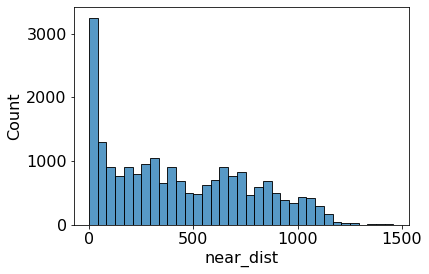

In [47]:
sns.histplot( x="near_dist", data= df, )

In [43]:
df2 = df.groupby( ['near_dist'], as_index = False )[trus_vars].mean()

In [74]:
trus_vars

['trust_relatives',
 'trust_neighbors',
 'trust_local_council',
 'intra_group_trust',
 'inter_group_trust']

In [59]:
df4 = df.groupby( ['murdock_name'], as_index = False )['exports', 'near_dist'].mean()

In [ ]:
g = sns.FacetGrid(df4, col="isocode", col_wrap = 4, sharex = False , sharey = False, hue = 'murdock_name' )
g.map(sns.scatterplot, "near_dist", "exports")

In [128]:
controls = "distsea age age2 male urban_dum  district_ethnic_frac frac_ethnicity_in_district  malaria_ecology total_missions_area explorer_contact railway_contact cities_1400_dum".split()
controls_dummys = "education occupation religion living_conditions isocode v30 v33".split()
df1 = df[ controls + controls_dummys + ['ln_export_area', 'trust_relatives' ] ].copy().dropna()

dummies = pd.get_dummies( df1[ controls_dummys ])
Z = pd.concat( [ df1[ controls ], dummies ], axis = 1 ).astype( float ).to_numpy()
X = df1['ln_export_area'].astype( float ).to_numpy()
y = df1['trust_relatives'].astype( float ).to_numpy()

reg1 = sm.OLS( X, Z ).fit()
x_hat = reg1.resi()

reg2 = sm.OLS( y, Z ).fit()
y_hat = reg2.predict()

df3 = pd.DataFrame({ 'Export Area' :reg1.predict(), 'Trust Relatives' : reg2.predict(), 
                    'Country': df1['isocode'].to_numpy(), 'murdock_name': df.loc[ df1.index, 'murdock_name'].to_numpy() })

<Figure size 5000x3000 with 0 Axes>

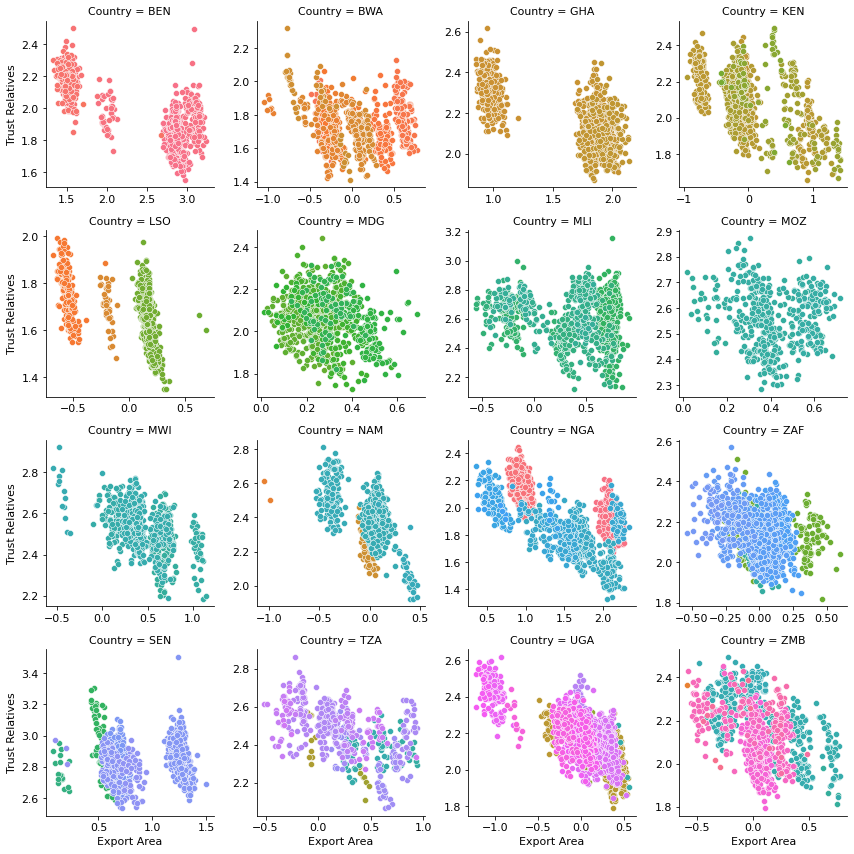

In [167]:
# Ticks size
plt.rcParams.update({'font.size': 11})

# Fix the size of figure
fig = plt.figure( figsize = ( 10, 6 ), dpi = 500 )

# Generate figure
g = sns.FacetGrid(df3, col="Country", col_wrap = 4, sharex = False , sharey = False, hue = 'dist' )
ax = g.map(sns.scatterplot, 'Export Area', 'Trust Relatives')

# Set all in page
plt.tight_layout( )

# Save figure
plt.savefig( r"_output/correlation_beta.png" )